## 1️⃣ Import Required Libraries

In this section, we import the necessary Python libraries for data manipulation and visualization.

- **pandas** → for data loading and preprocessing  
- **matplotlib** → for creating visualizations

## 2️⃣ Load the Titanic Dataset

We load the training and test datasets using pandas.

- `train.csv` contains survival information.
- `test.csv` contains passenger data without survival labels.

The dataset is stored locally and loaded into DataFrames for analysis.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1) Load data
# =========================
train_path = "/Users/suchitrahallikeri/Downloads/titanic/train.csv"  
df = pd.read_csv(train_path)
# Helpful cleanup
df["Sex"] = df["Sex"].str.title()  # male->Male, female->Female
df["Pclass"] = df["Pclass"].astype(int)

# Create output folder (optional)
# import os
# os.makedirs("outputs", exist_ok=True)

## 3️⃣ Data Cleaning and Preparation

Before analysis, we perform basic data cleaning:

- Standardize the `Sex` column (male/female formatting)
- Convert `Pclass` to integer format
- Handle missing values (if required)

This ensures consistency and prepares the dataset for visualization.

In [70]:
train_df = pd.read_csv("/Users/suchitrahallikeri/Downloads/titanic/train.csv")
serving_df = pd.read_csv("/Users/suchitrahallikeri/Downloads/titanic/test.csv")

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [87]:
import pandas as pd

train = pd.read_csv("/Users/suchitrahallikeri/Downloads/titanic-2/train.csv")
test  = pd.read_csv("/Users/suchitrahallikeri/Downloads/titanic-2/test.csv")
gender_sub = pd.read_csv("/Users/suchitrahallikeri/Downloads/titanic-2/gender_submission.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Ethical Visualization #2: Survival Rate by Passenger Class

This visualization shows survival percentage across passenger classes:

- 1st Class
- 2nd Class
- 3rd Class

### Method:
- Group data by `Pclass`
- Compute mean survival rate
- Convert to percentage
- Plot using a bar chart

### Ethical Considerations:
- Y-axis starts at 0 to prevent exaggeration.
- Percent values are clearly labeled above each bar.
- No manipulation of scale or selective filtering.

This ensures an honest and transparent comparison.

### Interpretation

Survival rates by class:

- 1st Class → Highest survival rate
- 2nd Class → Moderate survival rate
- 3rd Class → Lowest survival rate

This suggests socioeconomic status significantly influenced survival outcomes.

In [99]:
print("Female survival rate (%):", train.loc[train["Sex"]=="female","Survived"].mean()*100)
print("Male survival rate (%):", train.loc[train["Sex"]=="male","Survived"].mean()*100)

Female survival rate (%): 74.20382165605095
Male survival rate (%): 18.890814558058924


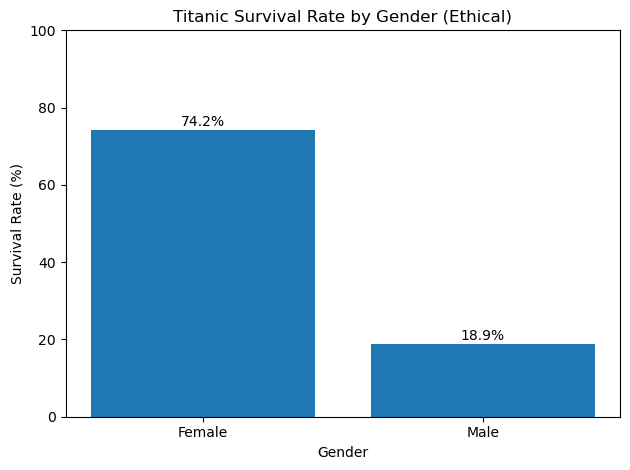

In [89]:
surv_by_gender = df.groupby("Sex")["Survived"].mean().sort_values(ascending=False) * 100

plt.figure()
plt.bar(surv_by_gender.index, surv_by_gender.values)
plt.ylim(0, 100)  # ethical: start at 0 for bars
plt.title("Titanic Survival Rate by Gender (Ethical)")
plt.xlabel("Gender")
plt.ylabel("Survival Rate (%)")

# Add labels on top of bars
for i, v in enumerate(surv_by_gender.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center")

plt.tight_layout()
plt.savefig("/Users/suchitrahallikeri/Downloads/titanic/gender_survival.png", dpi=200)
plt.show()     # <-- add this
plt.close()


## Misleading Visualization #1: Truncated Y-Axis

This chart intentionally truncates the y-axis to exaggerate differences between genders.

Instead of starting at 0, the axis begins at 40, making the difference appear much larger than it actually is.

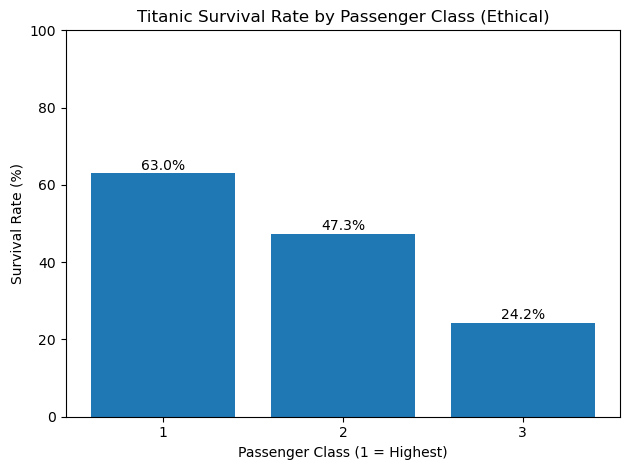

In [31]:
# =========================
# 3) Ethical Viz #2:
# Survival Rate by Passenger Class (bar chart, y-axis starts at 0)
# =========================
surv_by_class = df.groupby("Pclass")["Survived"].mean().sort_index() * 100

plt.figure()
plt.bar([str(x) for x in surv_by_class.index], surv_by_class.values)
plt.ylim(0, 100)  # ethical: start at 0 for bars
plt.title("Titanic Survival Rate by Passenger Class (Ethical)")
plt.xlabel("Passenger Class (1 = Highest)")
plt.ylabel("Survival Rate (%)")

for i, v in enumerate(surv_by_class.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center")

plt.tight_layout()
plt.savefig("/Users/suchitrahallikeri/Downloads/titanic-2/02_ethical_survival_by_class.png", dpi=300)
plt.show()   
# plt.close()  

### Why This Is Misleading

- The y-axis does not start at 0.
- This visually exaggerates the difference in survival rates.
- Viewers may incorrectly perceive a larger gap.

Truncated axes can distort perception and misrepresent data magnitude.

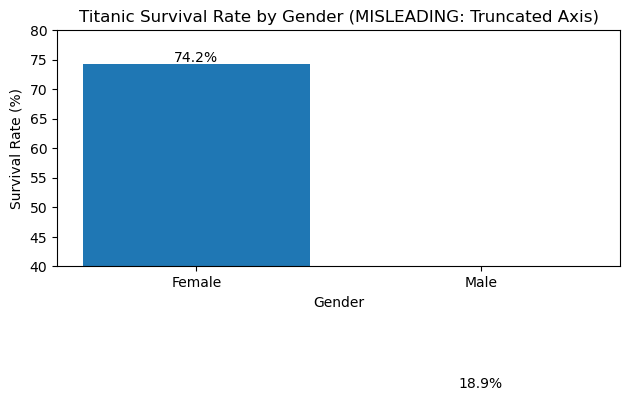

In [52]:
# =========================
# 4) Misleading Viz #1:
# Truncated Y-axis to exaggerate differences
# =========================

surv_by_gender = df.groupby("Sex")["Survived"].mean().sort_values(ascending=False) * 100

plt.figure()
plt.bar(surv_by_gender.index, surv_by_gender.values)

plt.ylim(40, 80)

plt.title("Titanic Survival Rate by Gender (MISLEADING: Truncated Axis)")
plt.xlabel("Gender")
plt.ylabel("Survival Rate (%)")

# Add labels
for i, v in enumerate(surv_by_gender.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center")

plt.tight_layout()
plt.savefig("/Users/suchitrahallikeri/Downloads/titanic-2/03_misleading_truncated_axis.png", dpi=300)

plt.show()

## Misleading Visualization #2: Cherry-Picking First Class Only

This visualization filters the dataset to include only first-class passengers.

By excluding other classes, the chart presents an incomplete picture of survival differences.

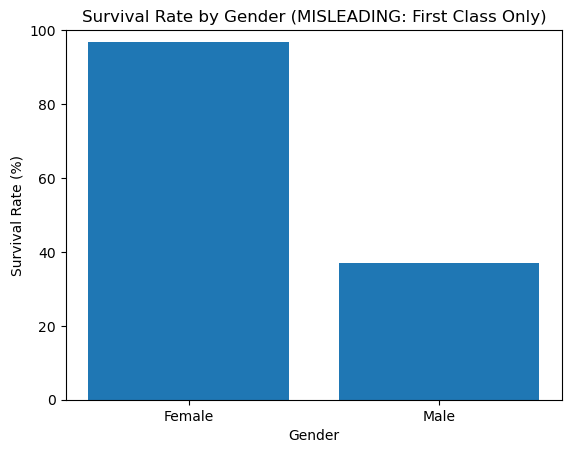

In [50]:
# =========================
# 5) Misleading Viz #2:
# Cherry-pick only First Class passengers
# =========================

# Filter to first-class only (MISLEADING)
df_first = df[df["Pclass"] == 1]

surv_first_gender = df_first.groupby("Sex")["Survived"].mean().sort_values(ascending=False) * 100

plt.figure()
plt.bar(surv_first_gender.index, surv_first_gender.values)
plt.ylim(0, 100)
plt.title("Survival Rate by Gender (MISLEADING: First Class Only)")
plt.xlabel("Gender")
plt.ylabel("Survival Rate (%)")
plt.savefig("/Users/suchitrahallikeri/Downloads/titanic-2/04_misleading_cherrypicked_firstclass.png", dpi=300)

plt.show()

### Why This Is Misleading

- Only first-class passengers are included.
- The full dataset is not represented.
- This selective filtering can bias interpretation.

Cherry-picking data removes important context and can lead to incorrect conclusions.

## Final Ethical Reflection

Through these examples, we observed:

- Ethical visualizations use complete data and appropriate scales.
- Misleading visualizations can distort reality through:
  - Truncated axes
  - Selective filtering
  - Context removal

Data visualization carries ethical responsibility.

Accurate scale, transparency, and completeness are essential for honest communication.